<a href="https://colab.research.google.com/github/BENMEZIAN/Seaborn-tutorial/blob/main/Part_03_Histogram_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting seaborn histogram using seaborn distplot function


In [3]:
import matplotlib.pyplot as plt
from scipy.stats import norm # for scientific Computing
import seaborn as sns

#Load "tips" DataFrame
tips_df = sns.load_dataset("tips")
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
# print the numeric columns
tips_df.select_dtypes(include='number').columns

Index(['total_bill', 'tip', 'size'], dtype='object')

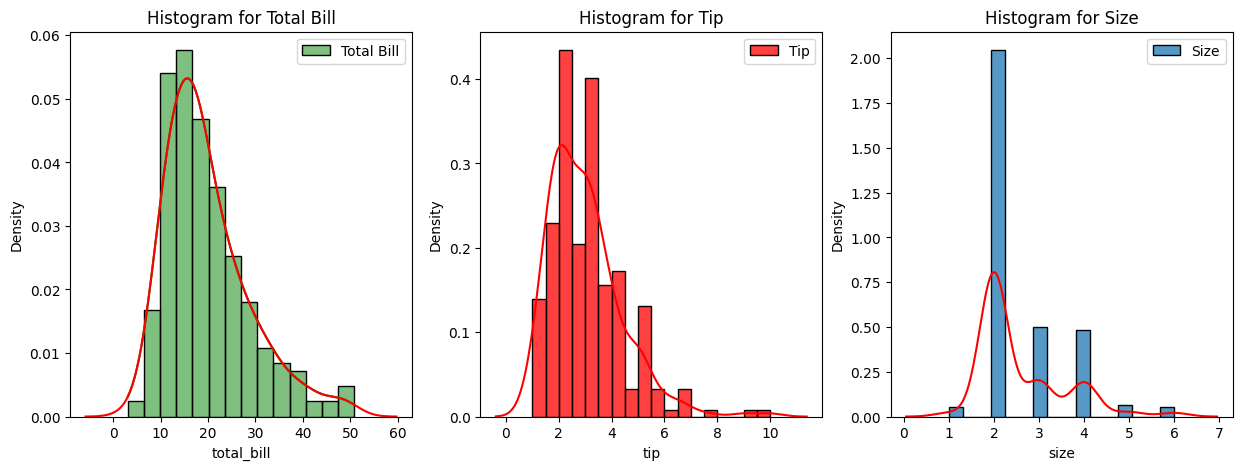

In [28]:
# use subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histogram for 'total_bill'
sns.histplot(tips_df['total_bill'], kde=True, stat="density", label="Total Bill", color='green', ax=axes[0])
sns.kdeplot(tips_df['total_bill'], color='red', ax=axes[0])  # Overlay KDE separately

# Histogram for 'tip'
sns.histplot(tips_df['tip'], kde=False, stat="density", label="Tip", color='red', ax=axes[1])
sns.kdeplot(tips_df['tip'], color='red', ax=axes[1])  # Overlay KDE separately

# Histogram for 'size'
sns.histplot(tips_df['size'], kde=False, stat="density",label="Size", ax=axes[2])
sns.kdeplot(tips_df['size'], color='red', ax=axes[2])  # Overlay KDE separately

# Add titles
axes[0].set_title('Histogram for Total Bill')
axes[1].set_title('Histogram for Tip')
axes[2].set_title('Histogram for Size')

# Add legend()
axes[0].legend()
axes[1].legend()
axes[2].legend()
plt.show()

In [16]:
comment="""
# prompt: what are the parameters of histplot()

The `histplot()` function in seaborn has numerous parameters.  Based on the provided code, here are some of the key parameters and their usage demonstrated:

* **`x` (or `y`):**  The data values to be plotted.  In the examples, this is a column from the `tips_df` DataFrame, such as `tips_df['total_bill']`. You can also use a pandas Series or a numpy array. This parameter is *required*.

* **`kde`:**  A boolean value that determines whether to plot a kernel density estimate (KDE) on top of the histogram. `kde=True` adds the KDE. In the example, it is used to overlay the density plot.

* **`stat`:** Specifies the statistic to represent on the y-axis. Options include:
    * `"count"`: Show the number of observations in each bin (the default).
    * `"density"`: Show the probability density function.  This normalizes the histogram so that the total area under the curve is 1.
    * `"probability"`: Show the probability of observations falling in each bin.  Similar to density but represents probability as a fraction (between 0 and 1).
    * `"frequency"`: Alias for `"count"`.

* **`ax`:** An axes object to plot on.  Useful for creating subplots. The examples show how to create a figure with multiple subplots and specify which subplot to plot each histogram on.

* **`bins`:** Determines the number of bins or the bin edges. Can be an integer (number of bins), a sequence (bin edges), or a string (e.g., "auto", "fd", "scott", "stone", "rice"). Controls the granularity of the histogram. It is not explicitly used in your example code, the default behavior is used.

* **`color`:**  The color of the histogram bars. You might pass a color name or hex code. Not shown in the example, but could be used.

* **`element`** -  How the histogram should be displayed. Default is `bars`.
    * `bars`: traditional bar plot
    * `step`: line plot showing the edges of the bars, or `poly` for a filled polygon.
    * `poly`: A filled polygon plot.



Other parameters exist for customization, such as `discrete` for discrete data, `shrink` to adjust the bar width, `alpha` for transparency, `linewidth` to adjust the bar outlines, and much more.  Refer to the official Seaborn documentation for a complete list and details.
"""

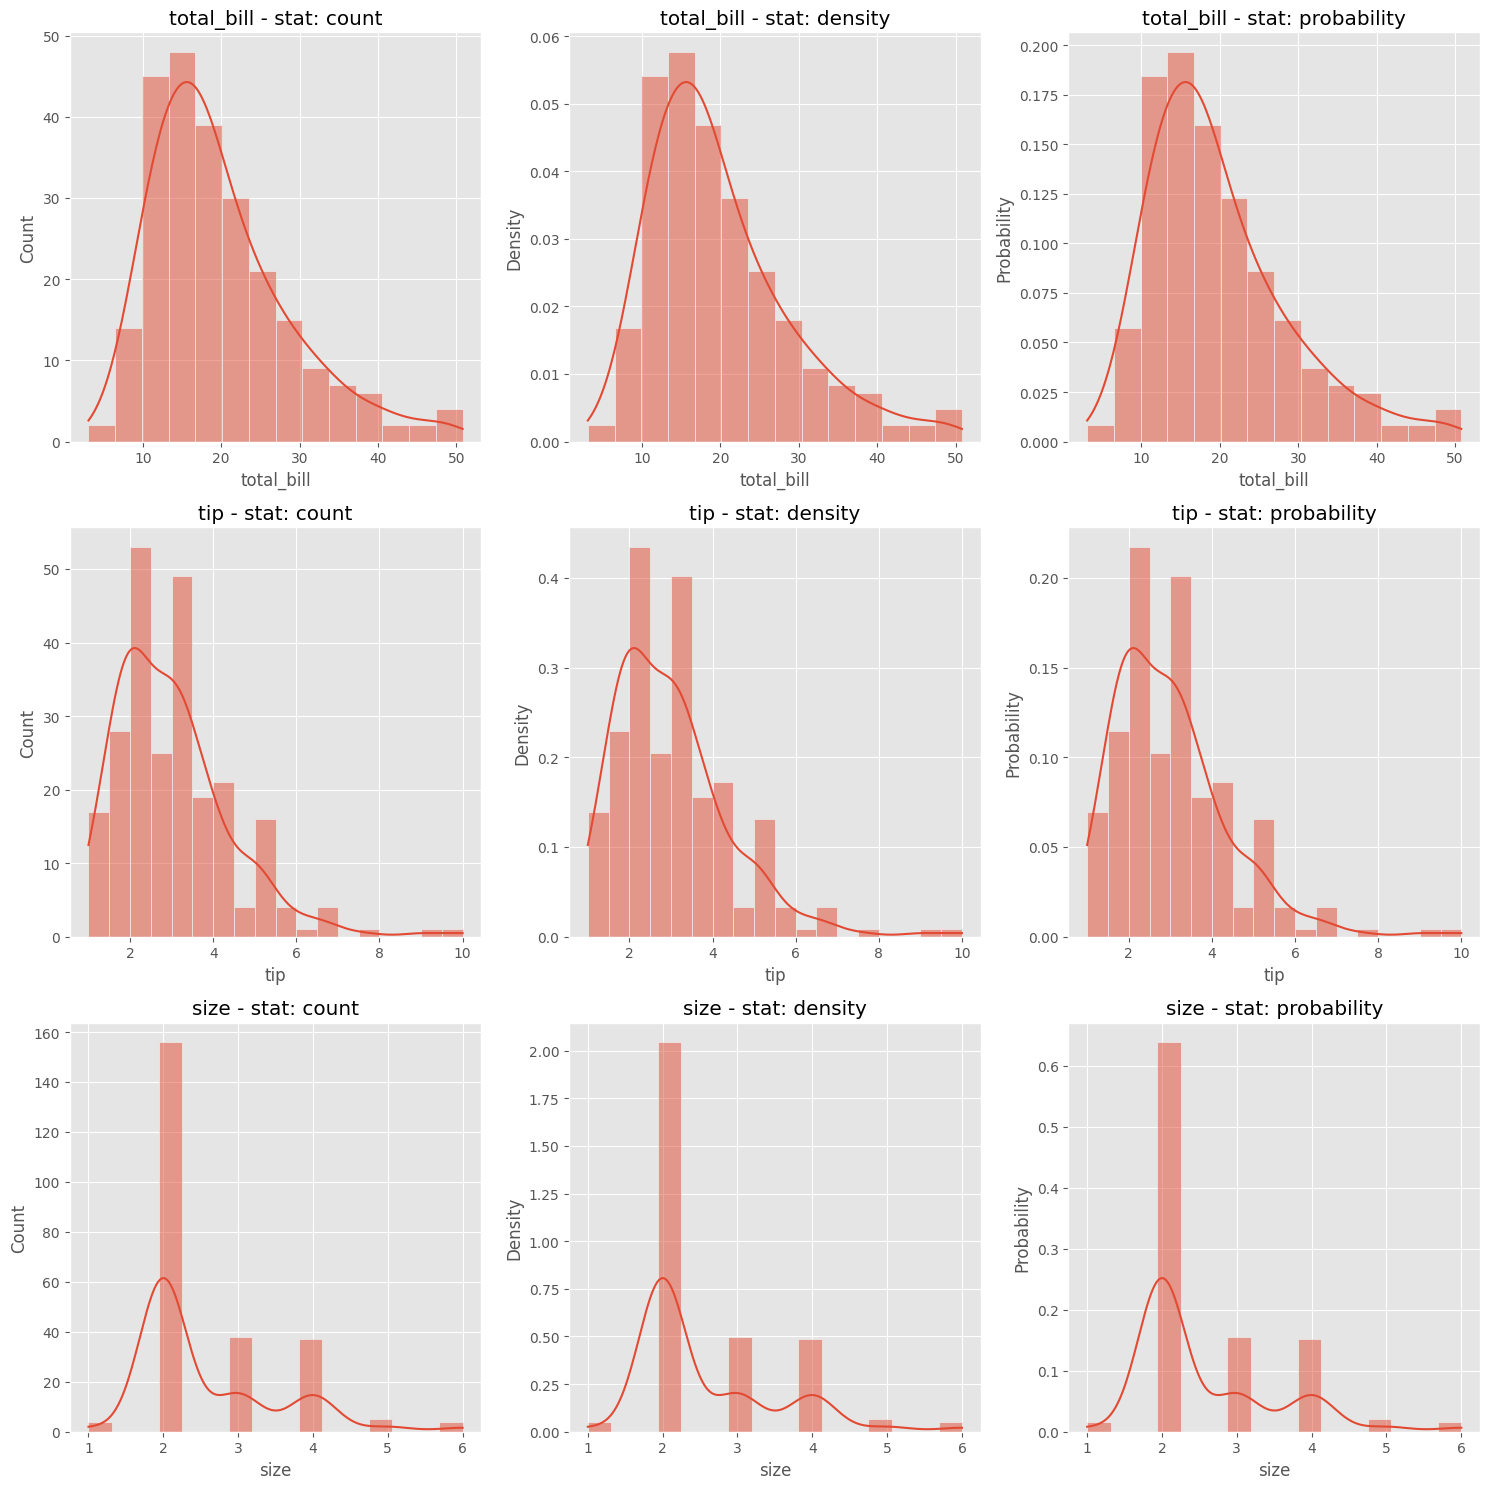

In [36]:
import matplotlib.pyplot as plt
from scipy.stats import norm # for scientific Computing
import seaborn as sns

# Load "tips" DataFrame
tips_df = sns.load_dataset("tips")

# Numeric columns
numeric_cols = tips_df.select_dtypes(include='number').columns

# Create subplots
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=3, figsize=(15, 5 * len(numeric_cols)))

# Iterate through numeric columns and different stat values
stat_values = ["count", "density", "probability"]
for i, col in enumerate(numeric_cols):
    for j, stat in enumerate(stat_values):
        ax = axes[i, j]
        sns.histplot(tips_df[col], kde=True, stat=stat, ax=ax)
        ax.set_title(f"{col} - stat: {stat}")

plt.tight_layout()
plt.show()

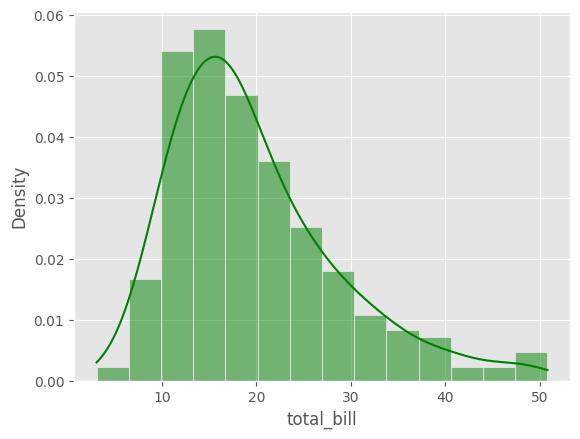

In [33]:
# use matplotlib library's set_style
plt.style.use('ggplot')
sns.histplot(tips_df['total_bill'], kde=True, stat="density", label="Total Bill", color='green')
plt.show()

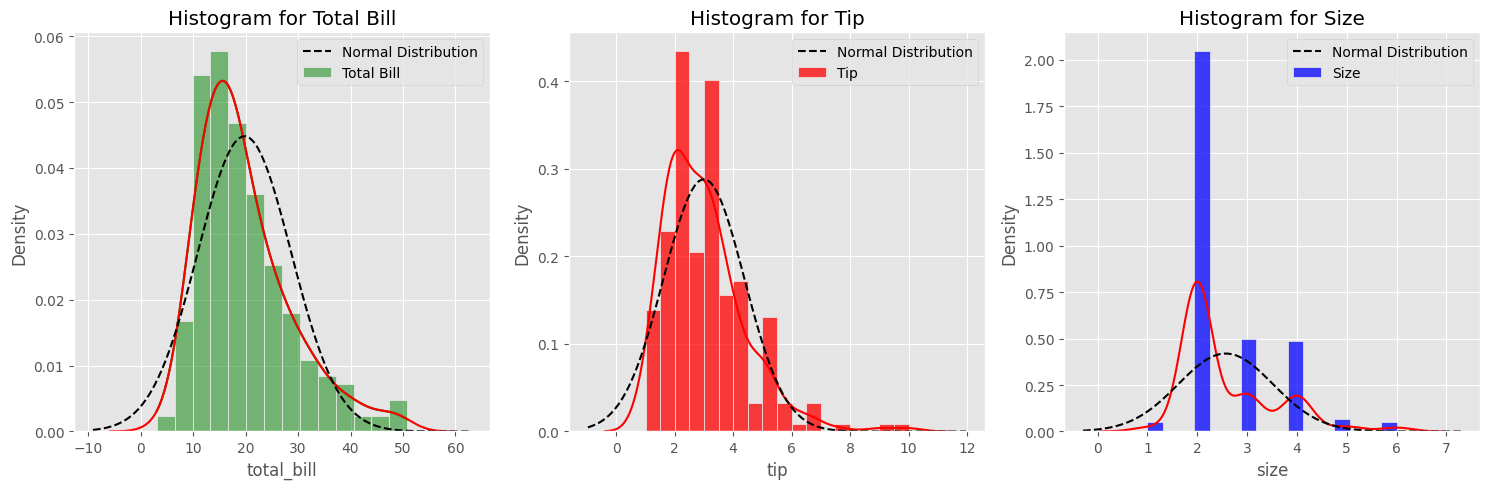

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histogram for 'total_bill'
sns.histplot(tips_df['total_bill'], kde=True, stat="density", color='green', ax=axes[0], label="Total Bill")
sns.kdeplot(tips_df['total_bill'], color='red', ax=axes[0])  # Overlay KDE separately
# Overlay normal distribution
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, tips_df['total_bill'].mean(), tips_df['total_bill'].std())
axes[0].plot(x, p, 'k--', label='Normal Distribution')
axes[0].set_title('Histogram for Total Bill')
axes[0].legend()

# Histogram for 'tip'
sns.histplot(tips_df['tip'], kde=False, stat="density", color='red', ax=axes[1], label="Tip")
sns.kdeplot(tips_df['tip'], color='red', ax=axes[1])  # Overlay KDE separately
# Overlay normal distribution
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, tips_df['tip'].mean(), tips_df['tip'].std())
axes[1].plot(x, p, 'k--', label='Normal Distribution')
axes[1].set_title('Histogram for Tip')
axes[1].legend()

# Histogram for 'size'
sns.histplot(tips_df['size'], kde=False, stat="density", color='blue', ax=axes[2], label="Size")
sns.kdeplot(tips_df['size'], color='red', ax=axes[2])  # Overlay KDE separately
# Overlay normal distribution
xmin, xmax = axes[2].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, tips_df['size'].mean(), tips_df['size'].std())
axes[2].plot(x, p, 'k--', label='Normal Distribution')
axes[2].set_title('Histogram for Size')
axes[2].legend()

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# https://indianaiproduction.com/seaborn-histogram-using-seaborn-distplot/